# ONLINE FRAUD DETECTION

Importing all the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

--------------------------------------------------------------------

### Loading The Dataset

In [3]:
df=pd.read_csv('onlinefraud.csv')


isFlaggedFraud: This represents the current, simple, rule-based system the business uses to try and catch fraud. This rule is extremely basic: "If a transfer is over 200,000, flag it."

I will delete this column

In [4]:
df.drop(columns=['isFlaggedFraud'], inplace=True)

------------

Shape of the dataFrame:

There are 63 lakhs rows in this dataset.
There are 11 columns in this dataset.

In [5]:
df.shape

(6362620, 10)

----------------------------------

In [6]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


---------------------

## Renaming the Columns

I find these column names difficult so  I will change the name of the few columns

for Example:

steps->elapsed_hours

nameOrig->sender_id

oldbalanceOrg->sender_old_balance

newbalanceOrig->sender_new_balance

nameDest->recipient_id

oldbalanceDest->recipient_old_balance

newbalanceDest->recipient_new_balance


In [7]:
rename_map = {
    'step': 'elapsed_hours',
    'type': 'type',
    'amount': 'amount',
    'nameOrig': 'sender_id',
    'oldbalanceOrg': 'sender_old_balance',
    'newbalanceOrig': 'sender_new_balance',
    'nameDest': 'recipient_id',
    'oldbalanceDest': 'recipient_old_balance',
    'newbalanceDest': 'recipient_new_balance',
    'isFraud': 'isFraud'
}
df.rename(columns=rename_map, inplace=True)

Checking whether the data types of the values of all the columns are correct

In [8]:
df.head()

,elapsed_hours,type,amount,sender_id,sender_old_balance,sender_new_balance,recipient_id,recipient_old_balance,recipient_new_balance,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   elapsed_hours          int64  
 1   type                   object 
 2   amount                 float64
 3   sender_id              object 
 4   sender_old_balance     float64
 5   sender_new_balance     float64
 6   recipient_id           object 
 7   recipient_old_balance  float64
 8   recipient_new_balance  float64
 9   isFraud                int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


All the data types are correct.


If we did not have the correct data type then we would have done this:

**df[<span style="color: lightblue">'column_name'</span>].<span style="color: purple">astype</span>(<span style="color: red">required_data_type</span>)**

---------------------------------------------------------------------------------------------------------------------------------

Taking the description of each column in the data set

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
elapsed_hours,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
sender_old_balance,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
sender_new_balance,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
recipient_old_balance,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
recipient_new_balance,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00


--------------------------

Checking for missing Values

In [11]:
df.isnull().sum()

elapsed_hours            0
type                     0
amount                   0
sender_id                0
sender_old_balance       0
sender_new_balance       0
recipient_id             0
recipient_old_balance    0
recipient_new_balance    0
isFraud                  0
dtype: int64

We found no missing values

-------------

##### Value Counts for Categorical Columns

Value Counts for type Column

In [12]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Value Counts for isFraud Column

In [13]:
vc=df['isFraud'].value_counts()
print(vc)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


Fraud distribution

In [14]:
(vc / len(df) * 100).round(6)

isFraud
0    99.870918
1     0.129082
Name: count, dtype: float64

We can say that the data in this is highly imbalanced. 

----------------

In [15]:
df.head()

,elapsed_hours,type,amount,sender_id,sender_old_balance,sender_new_balance,recipient_id,recipient_old_balance,recipient_new_balance,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


I will delete all the irrelevant columns

In [16]:
df.drop(columns=['sender_id', 'recipient_id'], inplace=True)

In [17]:
df.columns

Index(['elapsed_hours', 'type', 'amount', 'sender_old_balance',
       'sender_new_balance', 'recipient_old_balance', 'recipient_new_balance',
       'isFraud'],
      dtype='object')

Separating the numerical and categorical

In [18]:
numeric_cols={'amount', 'sender_old_balance', 'sender_new_balance', 'recipient_old_balance', 'recipient_new_balance'}


# Exploratory Data Analysis

## Univariate Analysis

-------------------------------

### Categorical

##### CountPlot

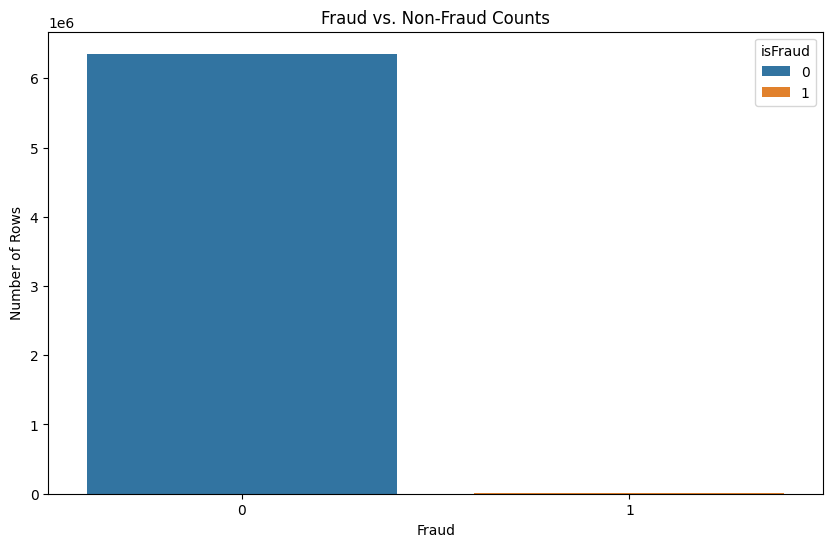

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', hue='isFraud', data=df)
plt.title('Fraud vs. Non-Fraud Counts')
plt.ylabel('Number of Rows')
plt.xlabel('Fraud')
plt.show()

In the top graph, we can see the dataset is highly imbalanced. For isFraud=1, the graph is ver small. It is not even visible. We add this **<span style="color: #57b0ff">plt.ylabel('log')</span>** to make y-axis to have a logarithmic scale. By doing this, we are compressing the large values and expanding thee small values.

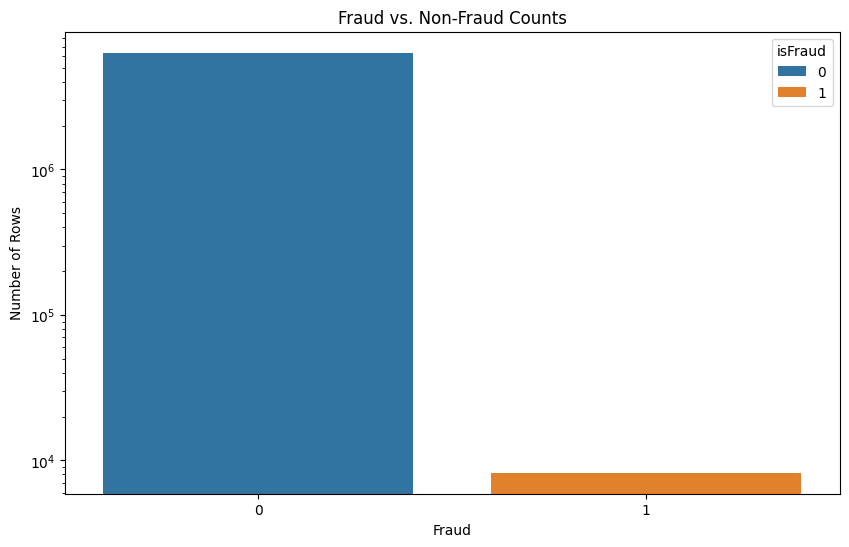

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', hue='isFraud', data=df)
plt.title('Fraud vs. Non-Fraud Counts')
plt.ylabel('Number of Rows')
plt.xlabel('Fraud')

plt.yscale('log')

plt.show()

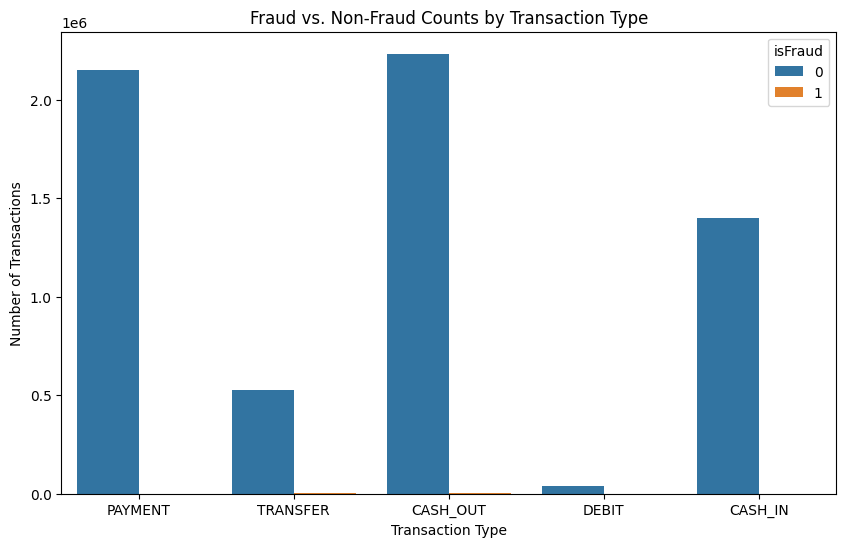

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Fraud vs. Non-Fraud Counts by Transaction Type')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Type')
plt.show()

In the top graph, we can see the dataset is highly imbalanced. For isFraud=1, the graph is ver small. It is not even visible. We add this **<span style="color: #57b0ff">plt.ylabel('log')</span>** to make y-axis to have a logarithmic scale. By doing this, we are compressing the large values and expanding thee small values.

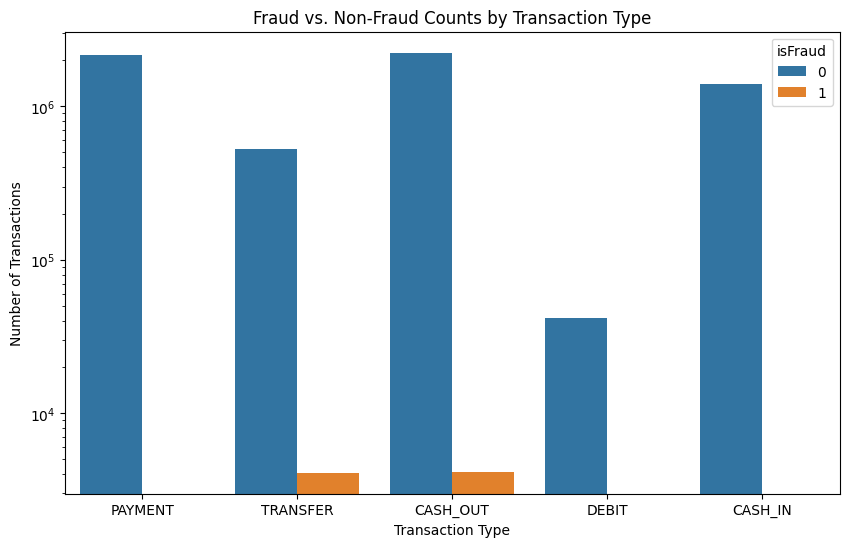

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Fraud vs. Non-Fraud Counts by Transaction Type')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Type')

plt.yscale('log')

plt.show()

-------------------

### Numerical 